In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [81]:
data = pd.read_csv("Assignment_Train.csv")
data.head()

DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE FIRST NAME MIDDLE NAME  LAST NAME      mobile AADHAR VERIFIED Cibil Score  MOBILE VERIFICATION                        DEALER NAME  TOTAL ASSET COST ASSET CTG  ASSET MODEL NO  APPLIED AMOUNT PRIMARY ASSET MAKE               Primary Asset Model No          Personal Email Address MARITAL STATUS GENDER      DOB  AGE       ADDRESS TYPE EMPLOY CONSTITUTION         EMPLOYER NAME  EMPLOYER TYPE                     Pan Name                         name      vpa              upi_name  Phone Social Premium.a23games  Phone Social Premium.amazon  Phone Social Premium.byjus  Phone Social Premium.flipkart  Phone Social Premium.housing  Phone Social Premium.indiamart  Phone Social Premium.instagram  Phone Social Premium.isWABusiness  Phone Social Premium.jeevansaathi  Phone Social Premium.jiomart  Phone Social Premium.microsoft  Phone Social Premium.my11  Phone Social Premium.paytm  Phone Social Premium.rummycircle  \
0     106989             07/20/2022        DELHI-SF            DELHI      SUNIL         NaN    CHANDER  9210574080              NO         726                 True           V D AUTO WHEELS CHHOTIAL           95041.0     MCEXA          139542           85000       HONDA MOTORS                      SHINE DRUM BSVI     SUNILSEHRAWAT7355@GMAIL.COM        Married   Male  1041978   44           Parental            SALARIED  sehrawat spare parts       SALARIED                  SUNIL KUMAR                SUNIL CHANDER  ABFSPAY           SUNIL KUMAR                            NaN                          1.0                         0.0                            1.0                           0.0                             1.0                             NaN                                NaN                                0.0                           NaN                             0.0                        NaN                         1.0                               NaN   
1     108975             07/28/2022        PATNA-SF            BIHAR      AMRIT         NaN      KUMAR  8877987018              NO         NaN                 True  CHANDAN AUTOMOBILES 259 KGS TOWER               NaN       NaN          140208           90000        HERO MOTORS     SPLENDOR PLUS SELF DRUM BSVI I3S                  NULL@GMAIL.COM            NaN   Male  1011997   25                NaN                 NaN                   NaN            NaN                  AMRIT KUMAR                  AMRIT KUMAR    OKSBI          Amrit  Kumar                            NaN                          1.0                         1.0                            1.0                           0.0                             1.0                             NaN                                NaN                                0.0                           NaN                             0.0                        NaN                         1.0                               NaN   
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL    ANIMESH         NaN      THAPA  8910862135              NO         737                 True         KN VISION 53HILL CART ROAD          119436.0     SCEXA          160001           75000       TVS MOTOR CO   TVS NTORQ SUPER SQUAD EDITION BSVI         CHETTRIDIKSHA@GMAIL.COM         Single   Male  9081999   22  Self/Spouse Owned       SELF-EMPLOYED           Thapas shop  SELF-EMPLOYED                ANIMESH THAPA                ANIMESH THAPA      NaN                   NaN                            NaN                          0.0                         0.0                            1.0                           0.0                             1.0                             NaN                                NaN                                0.0                           NaN                             0.0                        NaN                         0.0                               NaN   
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PR

In [82]:
# Checking for duplicate values
print("Number of duplicate in train_data rows:", data.duplicated().sum())

Number of duplicate in train_data rows: 9


In [83]:
# Remove all duplicate rows
data = data.drop_duplicates(keep=False)

In [84]:
# Checking again for duplicate values
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


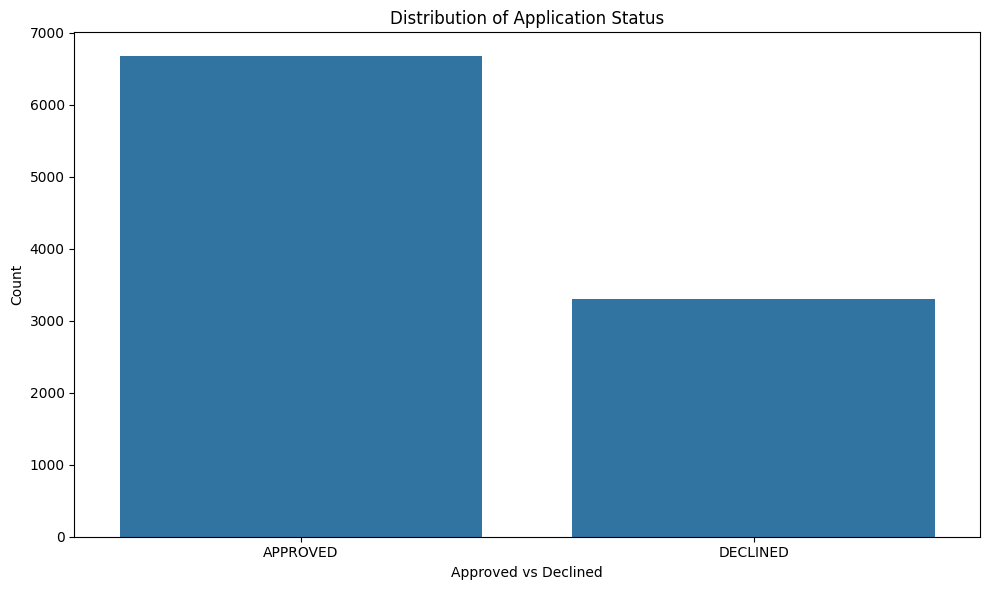

In [85]:
# Visualizing the distribution of the Application Status
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Application Status'])
plt.title('Distribution of Application Status')
plt.xlabel('Approved vs Declined')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Removing approved with 1 and declined with 0

In [86]:
# Replace values in the application_status column
data['Application Status'] = data['Application Status'].replace({'APPROVED': 1, 'DECLINED': 0})


/var/folders/wp/s8fr7yp915nc7r0yyv03jx700000gn/T/ipykernel_27036/1149075822.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Application Status'] = data['Application Status'].replace({'APPROVED': 1, 'DECLINED': 0})


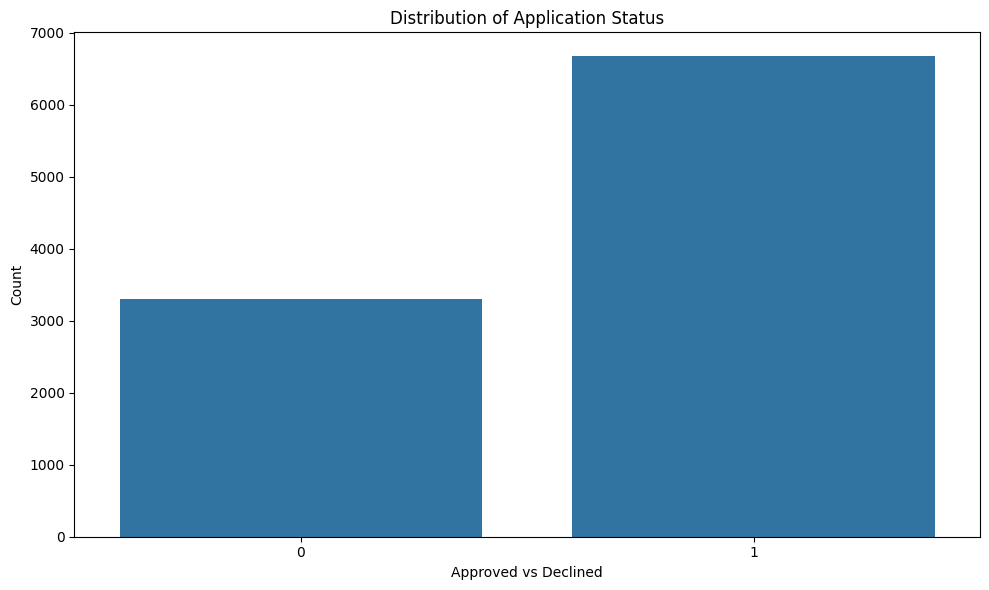

In [87]:
# Visualizing the distribution of the Application Status
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Application Status'])
plt.title('Distribution of Application Status')
plt.xlabel('Approved vs Declined')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From this plot we can see that the Target variable is quite imbalanced so we have had to make sure while training our dataset is balanced

In [88]:
# Checking null values in my columns
data.isna().sum()

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        852
FIRST NAME                                0
MIDDLE NAME                            7131
LAST NAME                               681
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                            4287
MOBILE VERIFICATION                       0
DEALER NAME                               4
TOTAL ASSET COST                       5090
ASSET CTG                              5090
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                         4876
GENDER                                    0
DOB                                       0
AGE                             

There are many columns with large number of null values in our dataset. First I'll deal with numeric columns

TOTAL ASSET COST has 5090 missing columns but I have had observed that the cost is between 50K to 200K so I can replace all the null values in TOTAL ASSET COST  with mean of the the values. Even After replcaing it with mean it's coorelation with target variable is very less so I will drop this idea.

In [89]:
# Calculate the mean of the TOTAL ASSET COST column
# mean_value = data['TOTAL ASSET COST'].mean()

# Replace null values with the mean
# data['TOTAL ASSET COST'] = data['TOTAL ASSET COST'].fillna(mean_value)

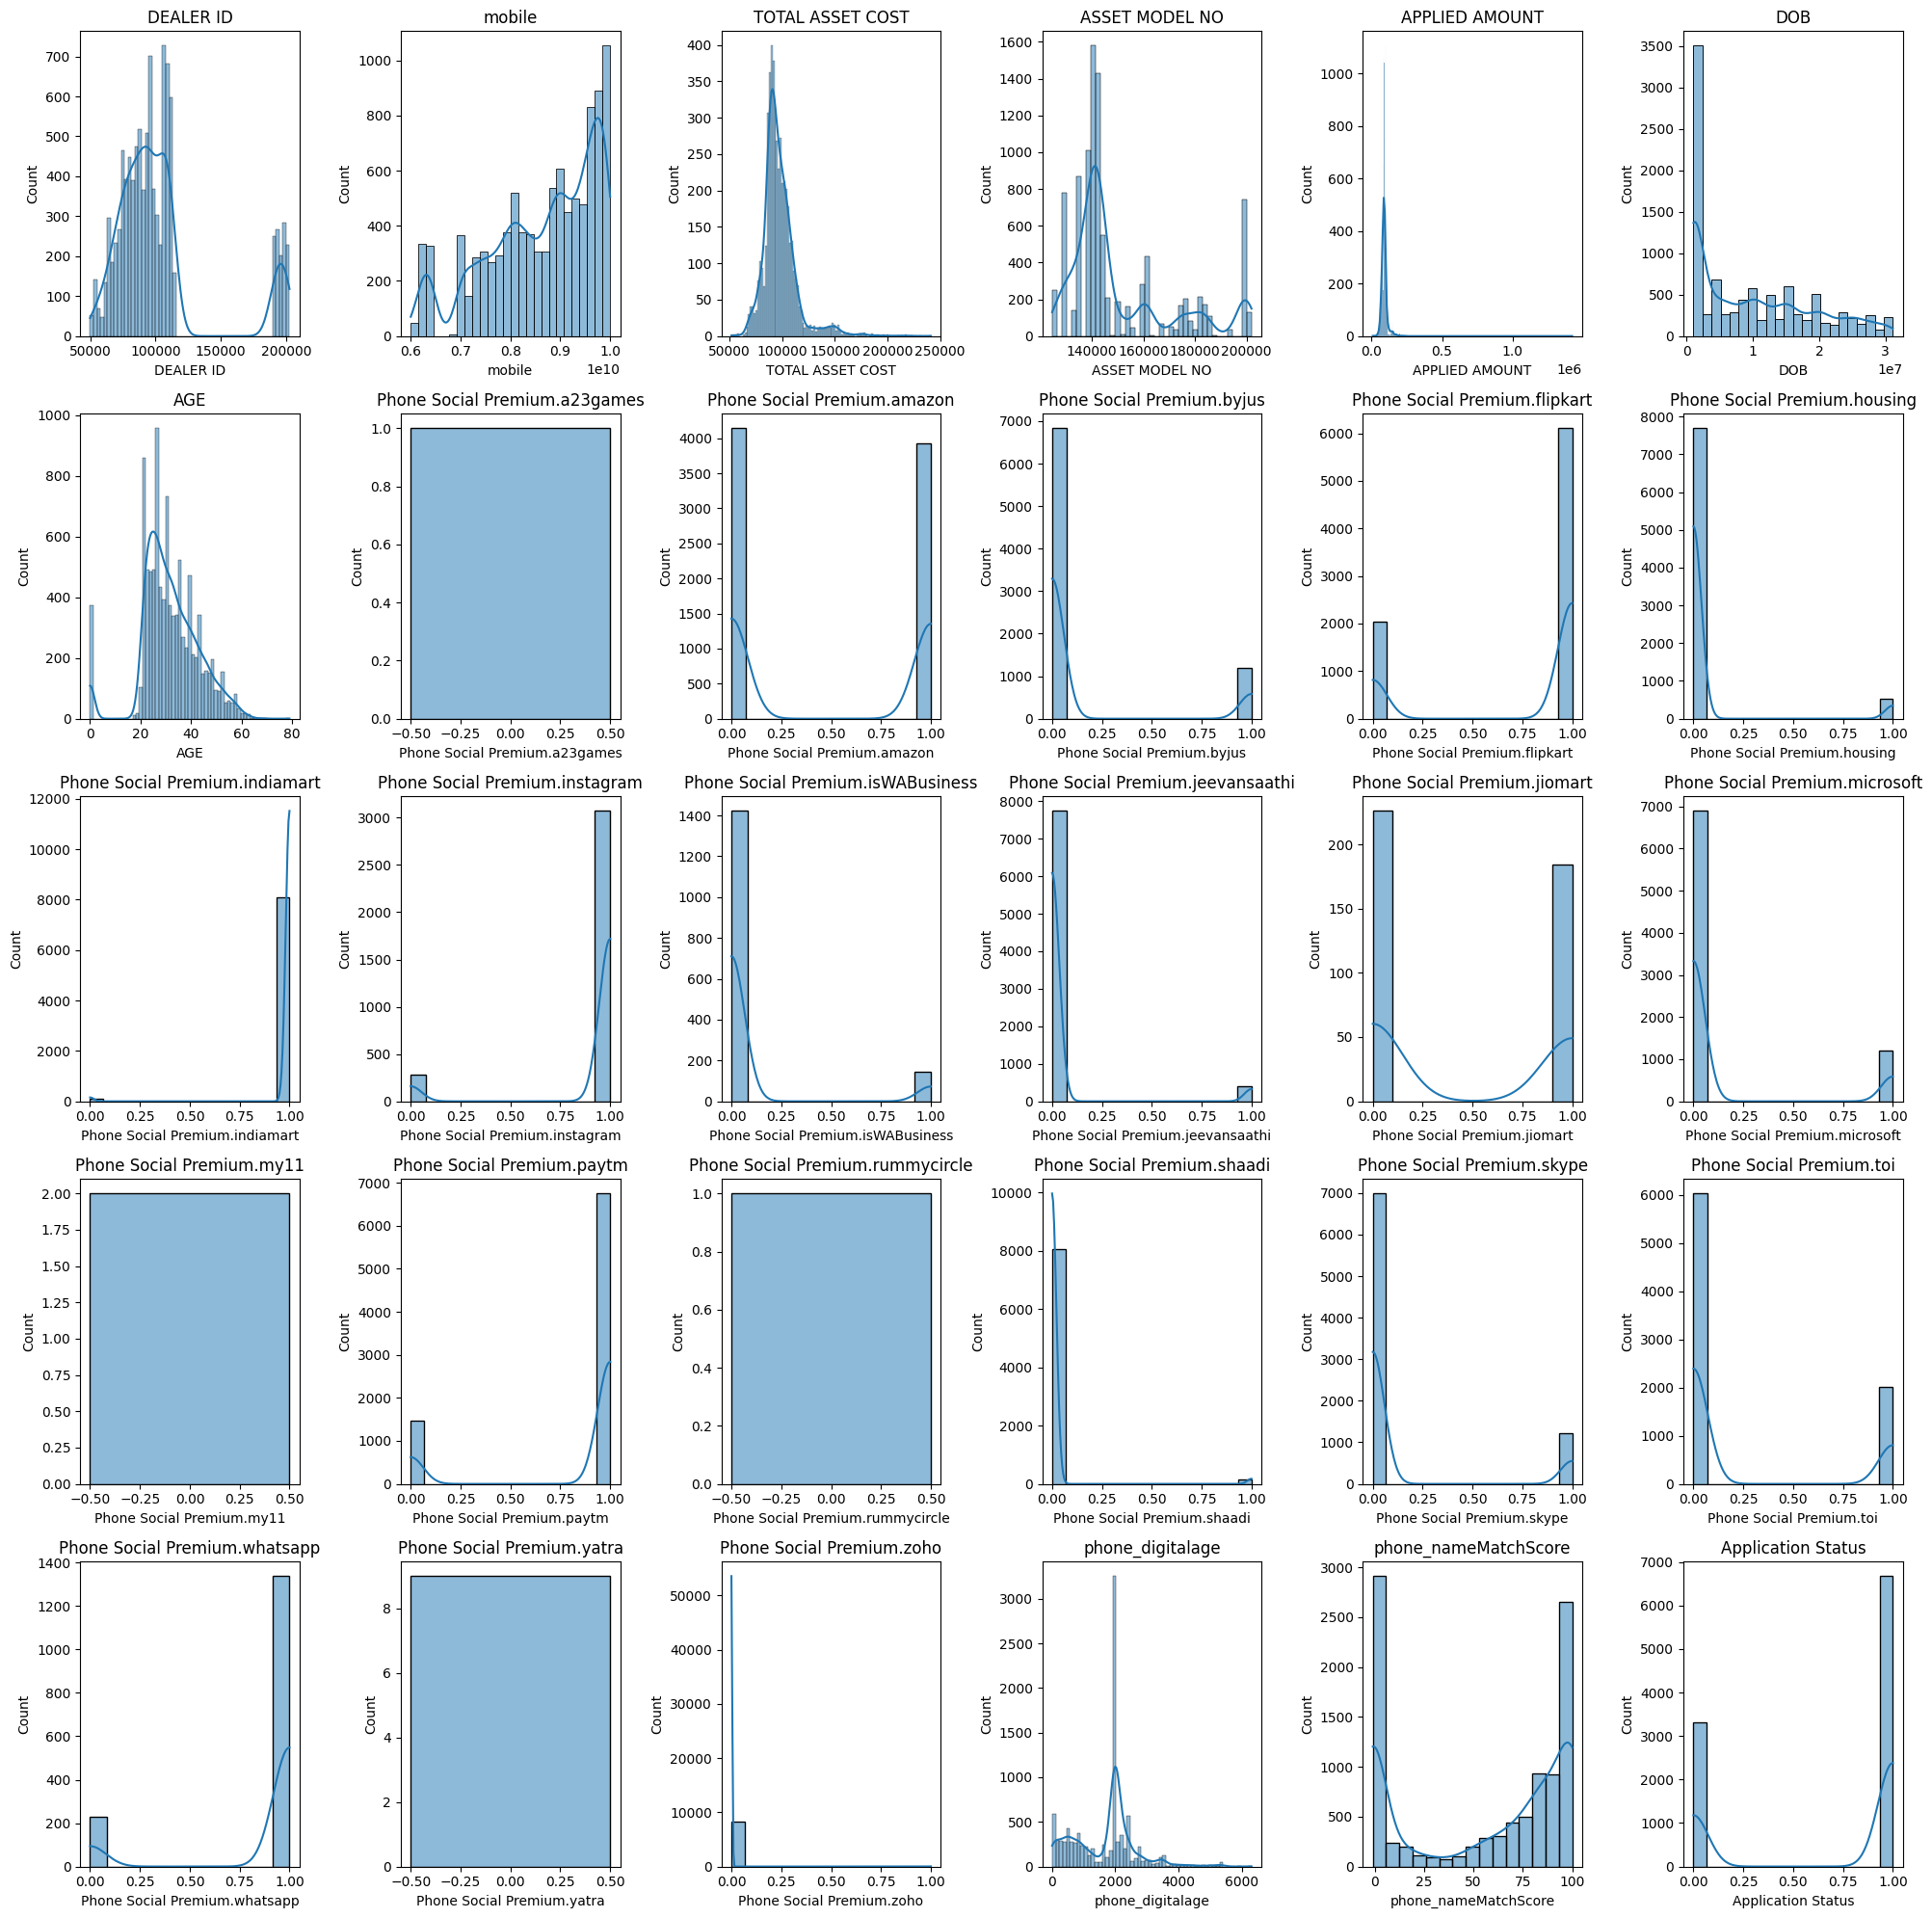

In [90]:
# Visualizing the distribution of numerical features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 6, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

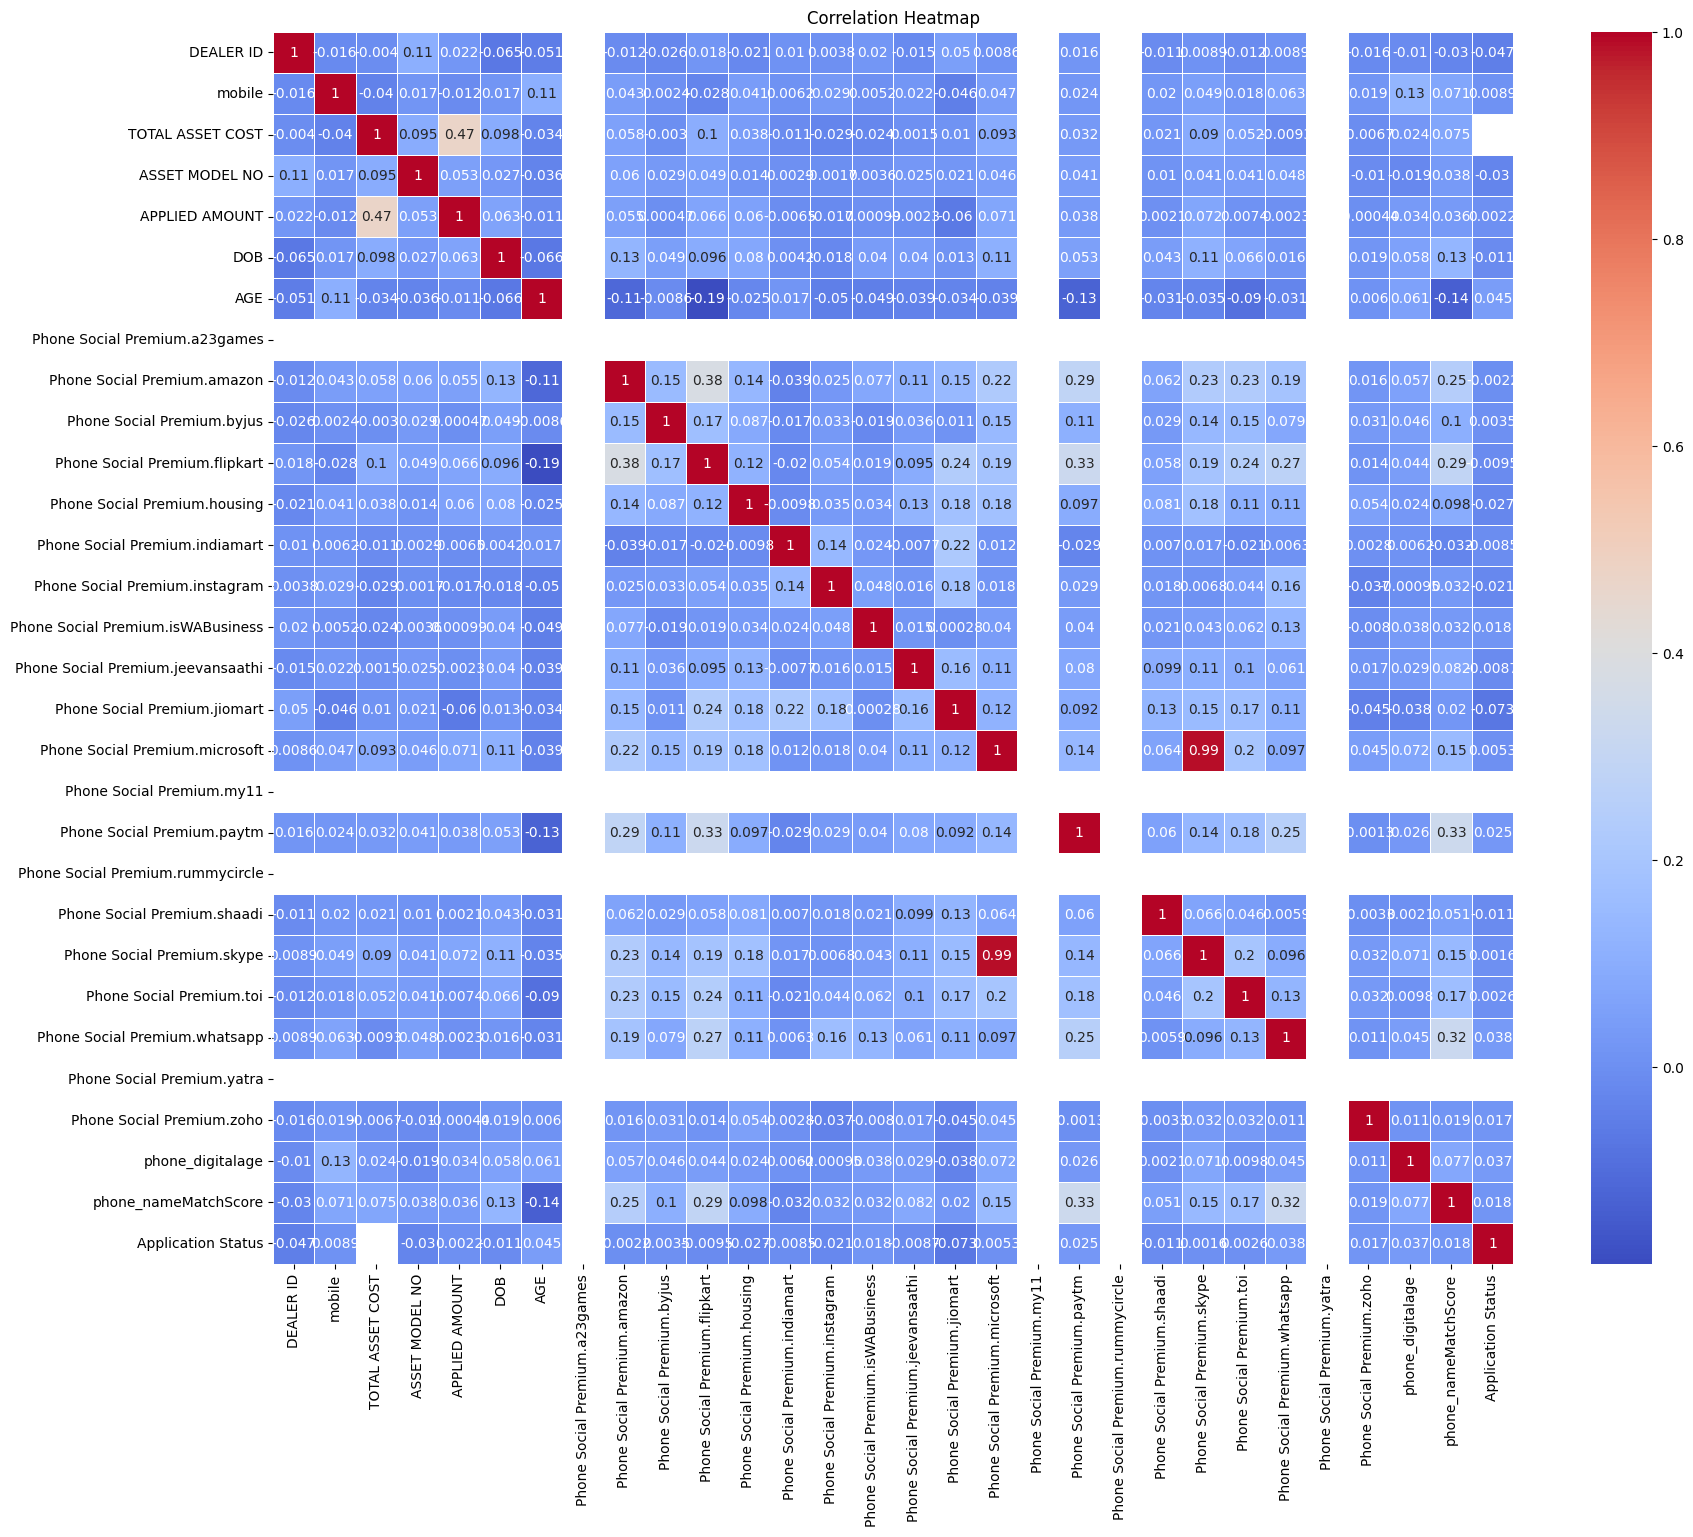

In [91]:
# Correlation heatmap for numerical features
plt.figure(figsize=(20, 16))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Application Status                   1.000000
AGE                                  0.044767
Phone Social Premium.whatsapp        0.037604
phone_digitalage                     0.037386
Phone Social Premium.paytm           0.025132
Phone Social Premium.isWABusiness    0.017974
phone_nameMatchScore                 0.017961
Phone Social Premium.zoho            0.017474
mobile                               0.008872
Phone Social Premium.microsoft       0.005295
Phone Social Premium.byjus           0.003522
Phone Social Premium.toi             0.002584
APPLIED AMOUNT                       0.002242
Phone Social Premium.skype           0.001646
Phone Social Premium.amazon         -0.002176
Phone Social Premium.indiamart      -0.008489
Phone Social Premium.jeevansaathi   -0.008681
Phone Social Premium.flipkart       -0.009451
DOB                                 -0.010817
Phone Social Premium.shaadi         -0.011128
Phone Social Premium.instagram      -0.021207
Phone Social Premium.housing      

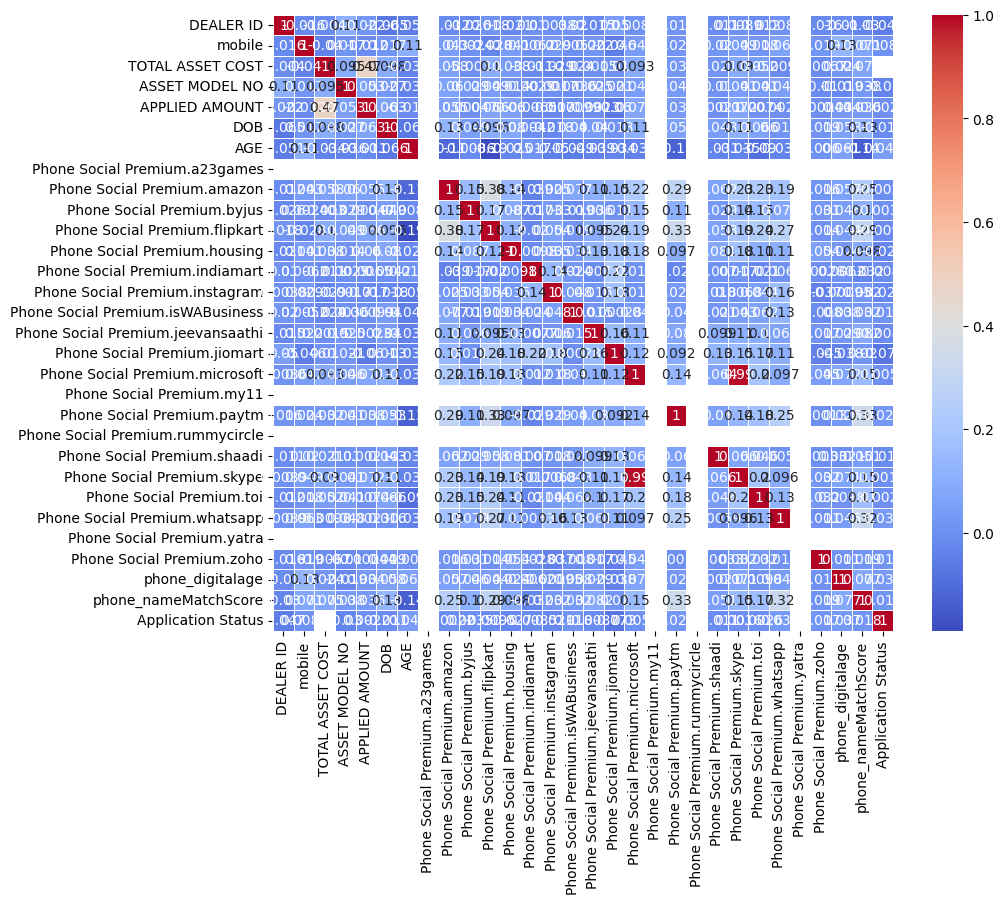

In [92]:
# Check correlation for numeric columns with Application Status
correlation_matrix = data[numeric_columns].corr()

# Display the correlation with the target variable
target_correlation = correlation_matrix['Application Status'].sort_values(ascending=False)
print(target_correlation)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

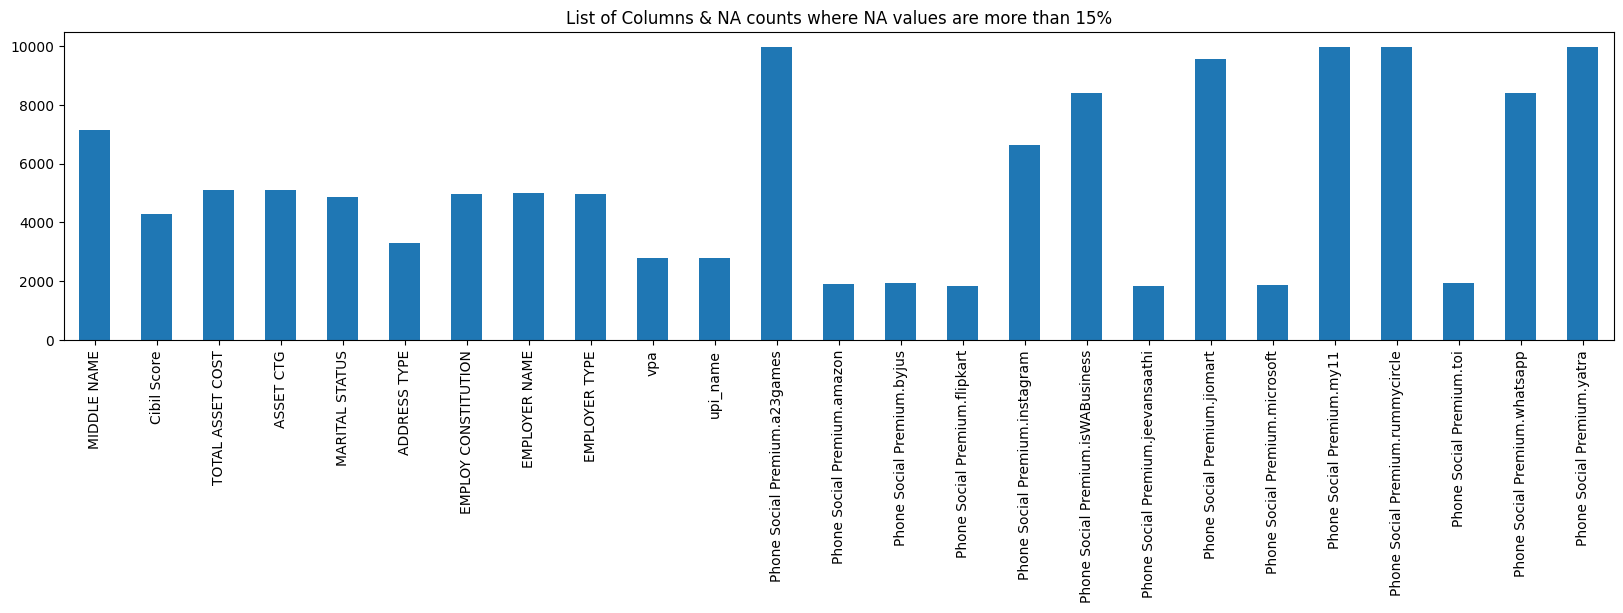

In [93]:
NA_col = data.isnull().sum()
NA_col = NA_col[NA_col.values >(0.18*len(data))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 15%')
plt.show()

As we can see there are 10000 rows & 55 columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So let's find out all columns where missing values are more than certain percentage, let's say 15%. We will remove those columns as it is not feasable to impute missing values for those columns.



# Data Cleaning and Manipulation¶

In [94]:
def removeNulls(dataframe, axis =1, percent=0.15):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.15(15%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

1. Remove columns where NA values are more than or equal to 15%

In [95]:
data = removeNulls(data, axis =1,percent = 0.15)

Number of Columns dropped	:  31

Old dataset rows,columns (9982, 55) 
New dataset rows,columns (9982, 24)


2. Remove rows where NA values are more than or equal to 15%
(Note: NA columns has already been removed in step 1, so we may not find any rows where 15% values are NA)

In [96]:
data = removeNulls(data, axis =0,percent = 0.15)


Number of Rows dropped	:  0

Old dataset rows,columns (9982, 24) 
New dataset rows,columns (9982, 24)


There are no rows where NA values are more than or equal to 15%

3. Remove columns where number of unique value is only 1.
Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [97]:
unique = data.nunique()
unique = unique[unique.values == 1]
print(unique.index)

Index(['AADHAR VERIFIED', 'MOBILE VERIFICATION'], dtype='object')


Dropped AADHAR VERIFIED and MOBILE VERIFICATION

In [98]:
data.drop(labels = list(unique.index), axis =1, inplace=True)
print("Now we are left with",data.shape ,"rows & columns.")

Now we are left with (9982, 22) rows & columns.


In [99]:
data.isna().sum()

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        852
FIRST NAME                                0
LAST NAME                               681
mobile                                    0
DEALER NAME                               4
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
GENDER                                    0
DOB                                       0
AGE                                       0
Pan Name                               1049
name                                      0
phone_digitalage                          4
phone_nameMatchScore                      4
phone_phoneFootprintStrengthOverall       6
Application Status                        0
dtype: int64

First name column has 0 missing values, last name column has 861 missing values, pan name has 1053 missig values whereas name has 0 missing values.
So I will drop all the columns except name column.

In [100]:
data = data.drop(["FIRST NAME","LAST NAME","Pan Name"],axis=1)

In [101]:
data.head()

DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE      mobile                        DEALER NAME  ASSET MODEL NO  APPLIED AMOUNT PRIMARY ASSET MAKE               Primary Asset Model No          Personal Email Address GENDER      DOB  AGE                         name  phone_digitalage  phone_nameMatchScore phone_phoneFootprintStrengthOverall  Application Status
0     106989             07/20/2022        DELHI-SF            DELHI  9210574080           V D AUTO WHEELS CHHOTIAL          139542           85000       HONDA MOTORS                      SHINE DRUM BSVI     SUNILSEHRAWAT7355@GMAIL.COM   Male  1041978   44                SUNIL CHANDER            5324.0             67.222222                                High                   1
1     108975             07/28/2022        PATNA-SF            BIHAR  8877987018  CHANDAN AUTOMOBILES 259 KGS TOWER          140208           90000        HERO MOTORS     SPLENDOR PLUS SELF DRUM BSVI I3S                  NULL@GMAIL.COM   Male  1011997   25                  AMRIT KUMAR            1998.0            100.000000                                High                   1
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL  8910862135         KN VISION 53HILL CART ROAD          160001           75000       TVS MOTOR CO   TVS NTORQ SUPER SQUAD EDITION BSVI         CHETTRIDIKSHA@GMAIL.COM   Male  9081999   22                ANIMESH THAPA              -1.0             -1.000000                                 Low                   1
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PRADESH  9758428017       MAHADEV AUTOMOBILES MANGLAUR          160832           78500        HERO MOTORS  SPLENDOR+ BLK ACCT SS DRUM I3S BSVI              ADITYA98@GAMIL.COM   Male  3071998   24                 ADITYA SINGH            1998.0             72.777778                                High                   1
4      55095             07/15/2022       MODASA-SF          GUJARAT  9687028486        DWARKESH AUTO SHAMLAJI ROAD          174641           70000       HONDA MOTORS                         DIO STD BSVI  PARMARHARESHBHAI1989@GMAIL.COM   Male  5071989   33  PARMAR HARESHBHAI AMRUTBHAI            1998.0             68.095238                                High                   0

In [102]:
data.isna().sum()

DEALER ID                                0
APPLICATION LOGIN DATE                   0
HDB BRANCH NAME                          1
HDB BRANCH STATE                       852
mobile                                   0
DEALER NAME                              4
ASSET MODEL NO                           0
APPLIED AMOUNT                           0
PRIMARY ASSET MAKE                       0
Primary Asset Model No                   0
Personal Email Address                   0
GENDER                                   0
DOB                                      0
AGE                                      0
name                                     0
phone_digitalage                         4
phone_nameMatchScore                     4
phone_phoneFootprintStrengthOverall      6
Application Status                       0
dtype: int64

In [103]:
data.head()

DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE      mobile                        DEALER NAME  ASSET MODEL NO  APPLIED AMOUNT PRIMARY ASSET MAKE               Primary Asset Model No          Personal Email Address GENDER      DOB  AGE                         name  phone_digitalage  phone_nameMatchScore phone_phoneFootprintStrengthOverall  Application Status
0     106989             07/20/2022        DELHI-SF            DELHI  9210574080           V D AUTO WHEELS CHHOTIAL          139542           85000       HONDA MOTORS                      SHINE DRUM BSVI     SUNILSEHRAWAT7355@GMAIL.COM   Male  1041978   44                SUNIL CHANDER            5324.0             67.222222                                High                   1
1     108975             07/28/2022        PATNA-SF            BIHAR  8877987018  CHANDAN AUTOMOBILES 259 KGS TOWER          140208           90000        HERO MOTORS     SPLENDOR PLUS SELF DRUM BSVI I3S                  NULL@GMAIL.COM   Male  1011997   25                  AMRIT KUMAR            1998.0            100.000000                                High                   1
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL  8910862135         KN VISION 53HILL CART ROAD          160001           75000       TVS MOTOR CO   TVS NTORQ SUPER SQUAD EDITION BSVI         CHETTRIDIKSHA@GMAIL.COM   Male  9081999   22                ANIMESH THAPA              -1.0             -1.000000                                 Low                   1
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PRADESH  9758428017       MAHADEV AUTOMOBILES MANGLAUR          160832           78500        HERO MOTORS  SPLENDOR+ BLK ACCT SS DRUM I3S BSVI              ADITYA98@GAMIL.COM   Male  3071998   24                 ADITYA SINGH            1998.0             72.777778                                High                   1
4      55095             07/15/2022       MODASA-SF          GUJARAT  9687028486        DWARKESH AUTO SHAMLAJI ROAD          174641           70000       HONDA MOTORS                         DIO STD BSVI  PARMARHARESHBHAI1989@GMAIL.COM   Male  5071989   33  PARMAR HARESHBHAI AMRUTBHAI            1998.0             68.095238                                High                   0

In [104]:
# Since Age is given hence DOB is not much needed, HDB BRANCH NAME, DEALER NAME, mobile, HDB BRANCH STATE, PRIMARY ASSET MAKE, Primary Asset Model No, Personal Email Address, name are not much important for me.
data = data.drop(["DOB","HDB BRANCH STATE", "HDB BRANCH NAME","DEALER NAME","mobile","PRIMARY ASSET MAKE", "Primary Asset Model No", "Personal Email Address", "name","APPLICATION LOGIN DATE"],axis=1)

In [105]:
# Replace male with 1 and female with 0
data['GENDER'] = data['GENDER'].replace({'Male': 1, 'Female': 0})

/var/folders/wp/s8fr7yp915nc7r0yyv03jx700000gn/T/ipykernel_27036/757734273.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GENDER'] = data['GENDER'].replace({'Male': 1, 'Female': 0})


In [106]:
# Removing rows with nan values
data = data.dropna(subset=['phone_phoneFootprintStrengthOverall'])

In [107]:
data.isna().sum()

DEALER ID                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
GENDER                                 0
AGE                                    0
phone_digitalage                       0
phone_nameMatchScore                   0
phone_phoneFootprintStrengthOverall    0
Application Status                     0
dtype: int64

In [108]:
# Perform one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Ensure all boolean values are converted to 0 and 1
data = data.astype(int)
data.head()

DEALER ID  ASSET MODEL NO  APPLIED AMOUNT  GENDER  AGE  phone_digitalage  phone_nameMatchScore  Application Status  phone_phoneFootprintStrengthOverall_Low  phone_phoneFootprintStrengthOverall_Medium  phone_phoneFootprintStrengthOverall_Very High  phone_phoneFootprintStrengthOverall_Very Low
0     106989          139542           85000       1   44              5324                    67                   1                                        0                                           0                                              0                                             0
1     108975          140208           90000       1   25              1998                   100                   1                                        0                                           0                                              0                                             0
2     111004          160001           75000       1   22                -1                    -1                   1                                        1                                           0                                              0                                             0
3     192020          160832           78500       1   24              1998                    72                   1                                        0                                           0                                              0                                             0
4      55095          174641           70000       1   33              1998                    68                   0                                        0                                           0                                              0                                             0

In [109]:
# Split Features and Target Varible
X = data.drop("Application Status",axis=1)
y = data['Application Status']

In [110]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Approved rate in train set:", y_train.mean())
print("Approved rate in test set:", y_test.mean())

Train set shape: (6983, 11)
Test set shape: (2993, 11)
Approved rate in train set: 0.6690534154374911
Approved rate in test set: 0.668894086201136


In [111]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test = scaler.transform(X_test)


In [112]:
# Handling class imbalance using SMOTE and RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
print("Original training set shape:", X_train.shape)
print("Original Approved rate in train set:", y_train.mean())
over = SMOTE(sampling_strategy=0.5)  # Increase minority class to 10% of majority
under = RandomUnderSampler(sampling_strategy=0.8)  # Reduce majority class to have twice as many samples as minority
resampling = Pipeline([('over', over), ('under', under)])
X_train, y_train = resampling.fit_resample(X_train, y_train)

print("Resampled training set shape:", X_train.shape)
print("Resampled Approved rate in train set:", y_train.mean())

Original training set shape: (6983, 11)
Original Approved rate in train set: 0.6690534154374911
Resampled training set shape: (5256, 11)
Resampled Approved rate in train set: 0.5555555555555556


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.9984779299847792
Training Data F1 Score  0.9986282578875172
Validation Mean F1 Score:  0.5314541589709915
Validation Mean Accuracy:  0.5365304815620104


# Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.
First let's try tuning 'Max_Depth' of tree


<Axes: xlabel='Max_Depth', ylabel='Values'>

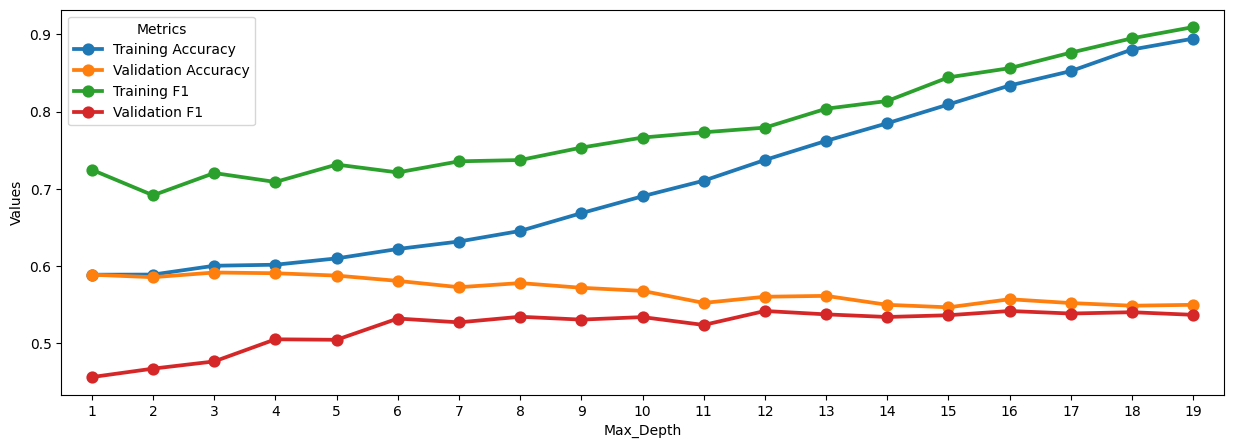

In [114]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.7; Optimum F1 Score: ~0.5

Visulazing Decision Tree with Max Depth = 3

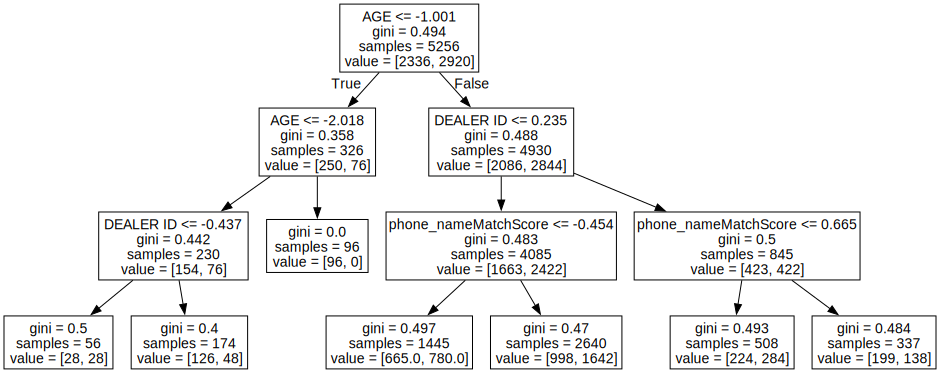

In [115]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

From above tree, we could see that a leaf has less than 10 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

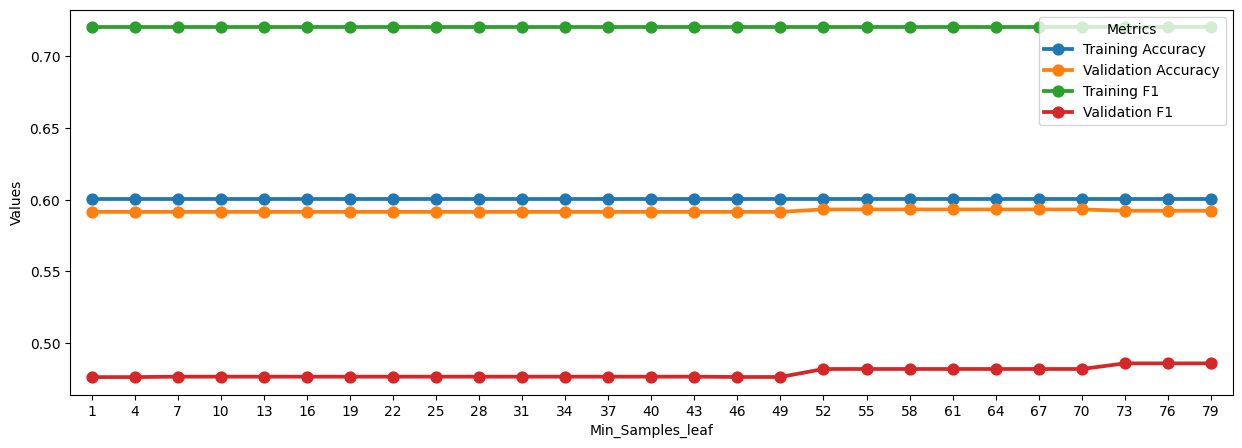

In [116]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [117]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6642165051787504
Test F1 Score:  0.7852105150673221
Confusion Matrix on Test Data


Predicted    0     1   All
True                      
0          151   840   991
1          165  1837  2002
All        316  2677  2993

Mis-classifications¶
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

# Model 2: Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.7265725288831836
Train Accuracy  0.5947488584474886
Validation Mean F1 Score:  0.47273943340845215
Validation Mean Accuracy:  0.5928460311200994


In [119]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6792515870364183
Test F1 Score:  0.8010774968918359
Confusion Matrix on Test Data


Predicted    0     1   All
True                      
0          100   891   991
1           69  1933  2002
All        169  2824  2993

Random Forest gives same results as Decision Tree Classifier. Finally, we will try Logistic Regression Model by sweeping threshold values.

# Model 3: Logistic Regression¶

<Axes: xlabel='Decision Threshold', ylabel='Values'>

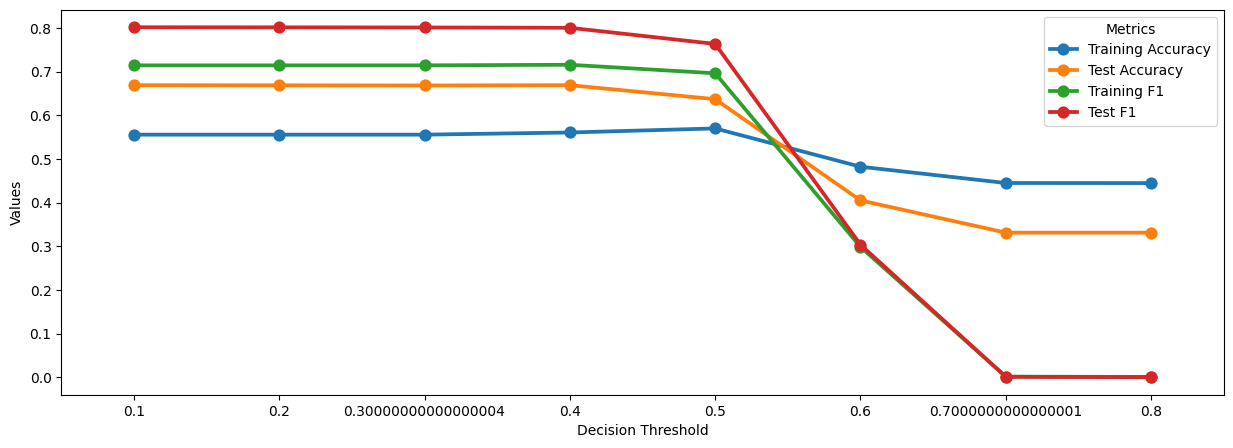

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Random Forest does slightly better than Decision Tree and Logistic Regression.


In [121]:
thresh = 0.3 #Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6682258603407952
Test F1 Score:  0.8010418753756762
Confusion Matrix on Test Data


Predicted  0     1   All
True                    
0          1   990   991
1          3  1999  2002
All        4  2989  2993

# For Test dataset

In [127]:
data.columns

Index(['DEALER ID', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'GENDER', 'AGE', 'phone_digitalage', 'phone_nameMatchScore', 'Application Status', 'phone_phoneFootprintStrengthOverall_Low', 'phone_phoneFootprintStrengthOverall_Medium', 'phone_phoneFootprintStrengthOverall_Very High', 'phone_phoneFootprintStrengthOverall_Very Low'], dtype='object')

In [128]:
# Load the test data
test_data = pd.read_csv("Assignment_Test.csv")
test_data.head()

UID  DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE FIRST NAME MIDDLE NAME   LAST NAME      mobile AADHAR VERIFIED Cibil Score  MOBILE VERIFICATION                          DEALER NAME  TOTAL ASSET COST ASSET CTG  ASSET MODEL NO  APPLIED AMOUNT PRIMARY ASSET MAKE           Primary Asset Model No     Personal Email Address MARITAL STATUS GENDER       DOB  AGE       ADDRESS TYPE EMPLOY CONSTITUTION              EMPLOYER NAME  EMPLOYER TYPE                             Pan Name                         name         vpa                upi_name  Phone Social Premium.a23games  Phone Social Premium.amazon  Phone Social Premium.byjus  Phone Social Premium.flipkart  Phone Social Premium.housing  Phone Social Premium.indiamart  Phone Social Premium.instagram  Phone Social Premium.isWABusiness  Phone Social Premium.jeevansaathi  Phone Social Premium.jiomart  Phone Social Premium.microsoft  Phone Social Premium.my11  Phone Social Premium.paytm  \
0  1844045271814558464     105615               07/12/22        HUBLI-SF              NaN  VENUGOPAL           H  BHARADHVAJ  7019759674              NO         757                 True       SHANTESHA AUTO PVT LTD PB ROAD           95352.0     SCECA          143241           88000       HONDA MOTORS               ACTIVA 6G STD BSVI         NULLMAIL@GMAIL.COM        Married   Male  10081965   56  Self/Spouse Owned            SALARIED         LIFE LINE HOSPITAL       SALARIED  VENUGOPAL SHESHAGIRI RAO BHARADHVAJ       VENUGOPAL H BHARADHVAJ  OKHDFCBANK  H VENUGOPAL BHARADHVAJ                            NaN                          0.0                         0.0                            0.0                           0.0                             1.0                             NaN                                0.0                                0.0                           NaN                             0.0                        NaN                         1.0   
1  1840349097823778816      91593             07/14/2022        SATNA-SF   MADHYA PRADESH   SHIVDHAR         NaN   CHAUDHARY  7697884828              NO         750                 True               YASH MOTORS PANNA ROAD           75371.0     MOECA          166536           75000       TVS MOTOR CO  XL 100 HD I TOUCH START WE BSVI             SHIV@GMAIL.COM        Married   Male   1011980   42           Parental       SELF-EMPLOYED  m/s shivdhar Kirana Store  SELF-EMPLOYED                   SHIVDHAR CHAUDHARY           SHIVDHAR CHAUDHARY         NaN                     NaN                            NaN                          0.0                         0.0                            0.0                           0.0                             1.0                             NaN                                0.0                                0.0                           NaN                             0.0                        NaN                         0.0   
2  1488102613362294272      74152               07/07/22      LUCKNOW-SF    UTTAR PRADESH     MANISH         NaN       VERMA  8840079825              NO         710                 True   JP MOTOR PRIVATE LTD NEXT TO CARAK           94983.0     SCECA          134123           93000       HONDA MOTORS                    ACTIVA 6G DLX  MANISHVERMA1996@GMAIL.COM         Single   Male  28091996   25  Self/Spouse Owned       SELF-EMPLOYED         RK TRADERS (OWNER)  SELF-EMPLOYED                         MANISH VERMA                 MANISH VERMA         AXL           MANISH  VERMA                            NaN                          1.0                         0.0                            1.0                           0.0                             1.0                             NaN                                0.0                                0.0                           NaN                             1.0                        NaN                         1.0   
3   555529923942874624     110164             07/13/2022       KOLLAM-SF       

In [129]:
# Replace male with 1 and female with 0 in GENDER column
test_data['GENDER'] = test_data['GENDER'].replace({'Male': 1, 'Female': 0})

/var/folders/wp/s8fr7yp915nc7r0yyv03jx700000gn/T/ipykernel_27036/2585319328.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['GENDER'] = test_data['GENDER'].replace({'Male': 1, 'Female': 0})


In [131]:
columns_to_use = ['DEALER ID', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'GENDER', 'AGE', 
                  'phone_digitalage', 'phone_nameMatchScore', 
                  'phone_phoneFootprintStrengthOverall']
test_data = test_data[columns_to_use]
test_data.head()

DEALER ID  ASSET MODEL NO  APPLIED AMOUNT  GENDER  AGE  phone_digitalage  phone_nameMatchScore phone_phoneFootprintStrengthOverall
0     105615          143241           88000       1   56               676                 100.0                              Medium
1      91593          166536           75000       1   42               897                  -1.0                                 Low
2      74152          134123           93000       1   25               839                 100.0                              Medium
3     110164          143627           95000       1   34              2050                  -1.0                                 Low
4     113037          143948           83000       1   24                -1                  -1.0                            Very Low

In [132]:
# Perform one-hot encoding
test_data = pd.get_dummies(test_data, drop_first=True)
# Ensure all boolean values are converted to 0 and 1
test_data = test_data.astype(int)

In [133]:
test_data.head()

DEALER ID  ASSET MODEL NO  APPLIED AMOUNT  GENDER  AGE  phone_digitalage  phone_nameMatchScore  phone_phoneFootprintStrengthOverall_Low  phone_phoneFootprintStrengthOverall_Medium  phone_phoneFootprintStrengthOverall_Very High  phone_phoneFootprintStrengthOverall_Very Low
0     105615          143241           88000       1   56               676                   100                                        0                                           1                                              0                                             0
1      91593          166536           75000       1   42               897                    -1                                        1                                           0                                              0                                             0
2      74152          134123           93000       1   25               839                   100                                        0                                           1                                              0                                             0
3     110164          143627           95000       1   34              2050                    -1                                        1                                           0                                              0                                             0
4     113037          143948           83000       1   24                -1                    -1                                        0                                           0                                              0                                             1

In [134]:
# Make sure we have the same columns as in the training data
for col in X.columns:
    if col not in test_data.columns:
        test_data[col] = 0

# Reorder columns to match the training data
test_data = test_data[X.columns]

In [135]:
# Scale the features
X_test_scaled = scaler.transform(test_data)

In [136]:
# Make predictions
y_pred_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > 0.3).astype(int)

In [137]:
# Create a DataFrame with UID and Prediction
predictions_df = pd.DataFrame({
    'UID': test_data.index,  # Assuming the index of test_data is the UID
    'Prediction': y_pred
})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [138]:
predi = pd.read_csv("predictions.csv")
